# 1. importing libraries

In [55]:
import pandas as pd     # csv file handling
import os   # file manipulation
import shutil   # file manipulation
import matplotlib.pyplot as plt

# 2. reading csv files 

In [56]:

csv_train=pd.read_csv("./Image data/Training_Set/RFMid_Training_labels.csv")
csv_test=pd.read_csv("./Image data/Test_Set/RFMid_Testing_labels.csv")
csv_eval=pd.read_csv("./Image data/Evaluation_Set/RFMid_Validation_labels.csv")
# csv_train.head()


# 3. creating subdirectories to place healthy and unhealthy retinal images

In [57]:
directory=os.getcwd()
directory=os.path.join(directory,"Image data\\")
for dir in os.listdir(directory):
    d=os.path.join(directory,dir)
    if os.path.isdir(d):
        p1=os.path.join(d,"healthy\\")
        p2=os.path.join(d,"unhealthy\\")
        os.mkdir(p1)
        os.mkdir(p2)
        print(d)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'c:\\Users\\Bhavini\\Git Repos\\RFMiD_py_tf\\Image data\\Evaluation_Set\\healthy\\'

# 4. extracting disease risk data into new dataframes 

In [58]:
train_risk=csv_train[['ID','Disease_Risk']].copy()
test_risk=csv_test[['ID','Disease_Risk']].copy()
eval_risk=csv_eval[['ID','Disease_Risk']].copy()
# train_risk
# test_risk
# eval_risk

# conversion from binary representation to string for easier classification

train_risk['Disease_Risk']=train_risk['Disease_Risk'].replace(1,"healthy").astype(str)
train_risk['Disease_Risk']=train_risk['Disease_Risk'].replace('0',"unhealthy").astype(str)
test_risk['Disease_Risk']=test_risk['Disease_Risk'].replace(1,"healthy").astype(str)
test_risk['Disease_Risk']=test_risk['Disease_Risk'].replace('0',"unhealthy").astype(str)
eval_risk['Disease_Risk']=eval_risk['Disease_Risk'].replace(1,"healthy").astype(str)
eval_risk['Disease_Risk']=eval_risk['Disease_Risk'].replace('0',"unhealthy").astype(str)

# 5. plotting of graphs according to disease to compare 

## 5.1. training set

[Text(0, 0, '376'),
 Text(0, 0, '100'),
 Text(0, 0, '317'),
 Text(0, 0, '138'),
 Text(0, 0, '101'),
 Text(0, 0, '73'),
 Text(0, 0, '186'),
 Text(0, 0, '14'),
 Text(0, 0, '47'),
 Text(0, 0, '15'),
 Text(0, 0, '37'),
 Text(0, 0, '282'),
 Text(0, 0, '28'),
 Text(0, 0, '6'),
 Text(0, 0, '16'),
 Text(0, 0, '65'),
 Text(0, 0, '58'),
 Text(0, 0, '5'),
 Text(0, 0, '17'),
 Text(0, 0, '11'),
 Text(0, 0, '14'),
 Text(0, 0, '43'),
 Text(0, 0, '32'),
 Text(0, 0, '15'),
 Text(0, 0, '22'),
 Text(0, 0, '11'),
 Text(0, 0, '6'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

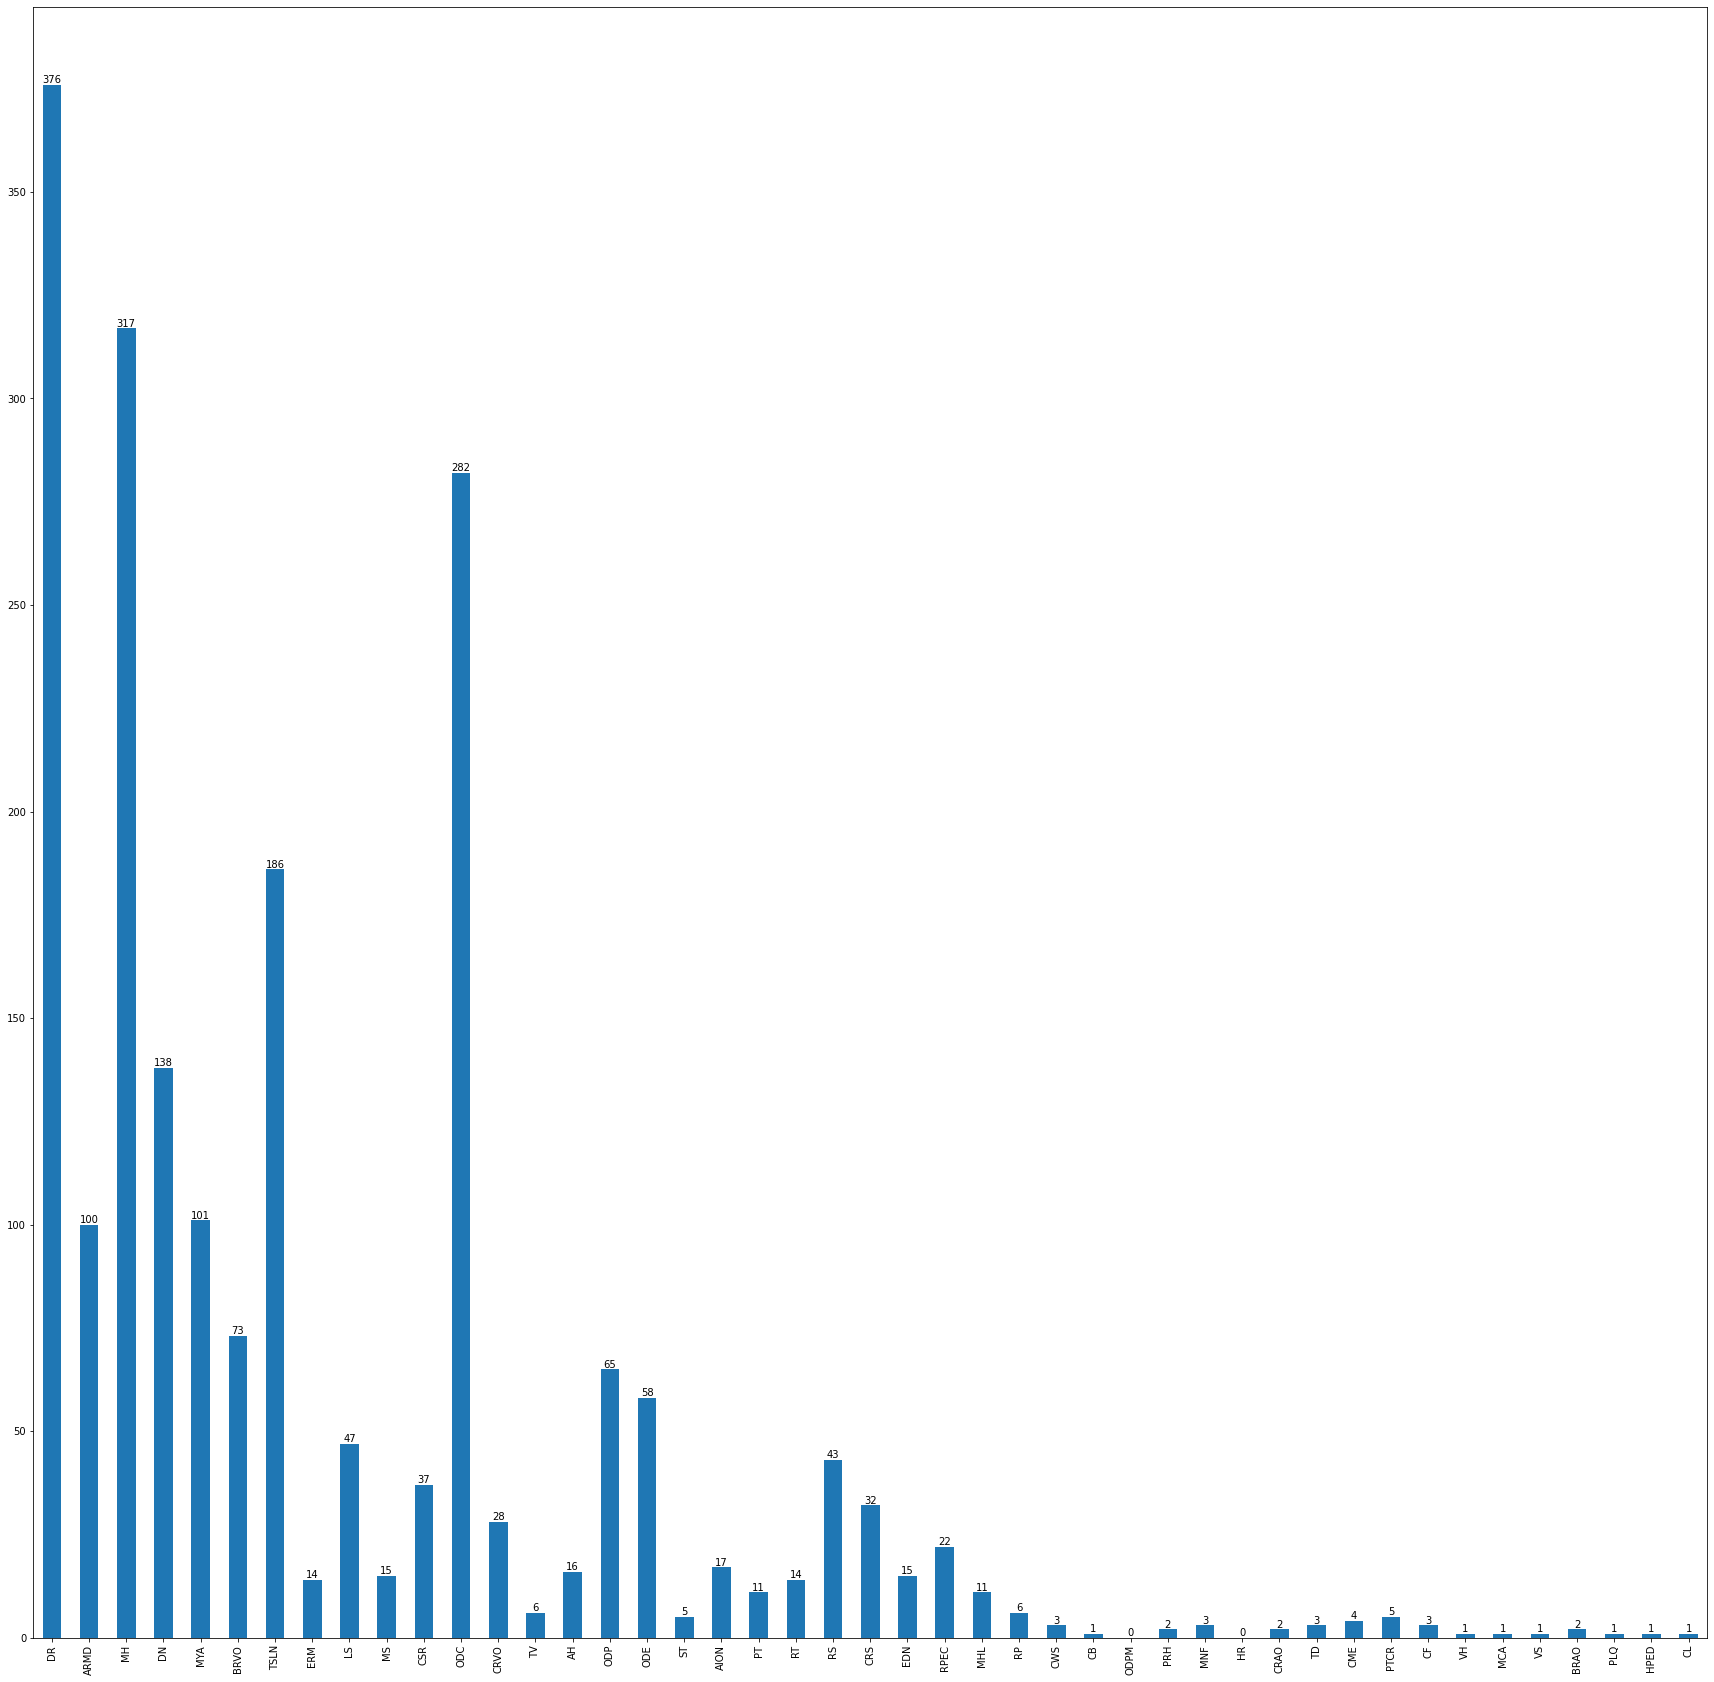

In [59]:
train_plot=csv_train.copy()
#train_plot
train_plot.drop("ID",axis=1,inplace=True)
train_plot.drop("Disease_Risk",axis=1,inplace=True)
train_plot = train_plot.sum()
ax=train_plot.plot.bar(figsize=(30,30))
ax.bar_label(ax.containers[0])


## 5.2. testing set

In [ ]:
test_plot=csv_test.copy()
#train_plot
test_plot.drop("ID",axis=1,inplace=True)
test_plot.drop("Disease_Risk",axis=1,inplace=True)
test_plot = test_plot.sum()
ax=test_plot.plot.bar(figsize=(30,30))
ax.bar_label(ax.containers[0])


## 5.3. evaluation set

In [ ]:
eval_plot=csv_eval.copy()
#train_plot
eval_plot.drop("ID",axis=1,inplace=True)
eval_plot.drop("Disease_Risk",axis=1,inplace=True)
eval_plot = eval_plot.sum()
ax=eval_plot.plot.bar(figsize=(30,30))
ax.bar_label(ax.containers[0])

# 6. plotting healthy and unhealthy retinal statistics

## 5.1. training set

[Text(0, 0, '1519'), Text(0, 0, '401')]

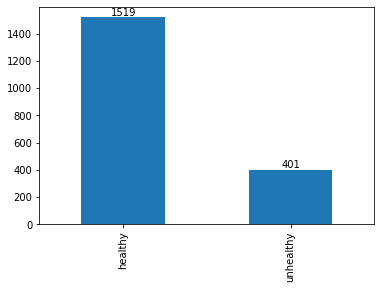

In [65]:
ax=train_risk['Disease_Risk'].value_counts().plot.bar()
ax.bar_label(ax.containers[0])


# 7. segregating images into healthy and unhealthy subdirectories

In [69]:
csv_train.where(csv_train['Disease_Risk']==1)
csv_train.Disease_Risk=csv_train.Disease_Risk.astype(str)
csv_train.dtypes

ID               int64
Disease_Risk    object
DR               int64
ARMD             int64
MH               int64
DN               int64
MYA              int64
BRVO             int64
TSLN             int64
ERM              int64
LS               int64
MS               int64
CSR              int64
ODC              int64
CRVO             int64
TV               int64
AH               int64
ODP              int64
ODE              int64
ST               int64
AION             int64
PT               int64
RT               int64
RS               int64
CRS              int64
EDN              int64
RPEC             int64
MHL              int64
RP               int64
CWS              int64
CB               int64
ODPM             int64
PRH              int64
MNF              int64
HR               int64
CRAO             int64
TD               int64
CME              int64
PTCR             int64
CF               int64
VH               int64
MCA              int64
VS               int64
BRAO       

## 7.1. training set

In [72]:
for index, row in train_risk.iterrows():
    src=os.path.join(directory,"Training_Set\\Training\\"+str(index+1)+".png")
    healthy=os.path.join(directory,"Training_Set\\healthy\\"+str(index+1)+".png")
    unhealthy=os.path.join(directory,"Training_Set\\unhealthy\\"+str(index+1)+".png")
    if row['Disease_Risk']=="healthy":
        shutil.move(src,healthy)
    else:
        shutil.move(src,unhealthy)
        